In [1]:
%matplotlib inline

# Un vistazo a los datos
Vamos a cargar el vector de características.

In [2]:
from dns_attacks_detection import *

1.13.3


In [3]:
dns = create_feature_vector_from_log_file('3JUL.log', extract_features_with_letters_and_numbers)

In [4]:
dns.head()

,attack,letters,longest_number,numbers,other
0,0,1.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0


In [5]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 5 columns):
attack            52610 non-null int64
letters           52610 non-null float64
longest_number    52610 non-null float64
numbers           52610 non-null float64
other             52610 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.0 MB


In [6]:
dns.describe()

,attack,letters,longest_number,numbers,other
count,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000
mean,0.050960,0.887117,0.092291,0.111230,0.001654
std,0.219918,0.277083,0.246846,0.277009,0.013217
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.250000


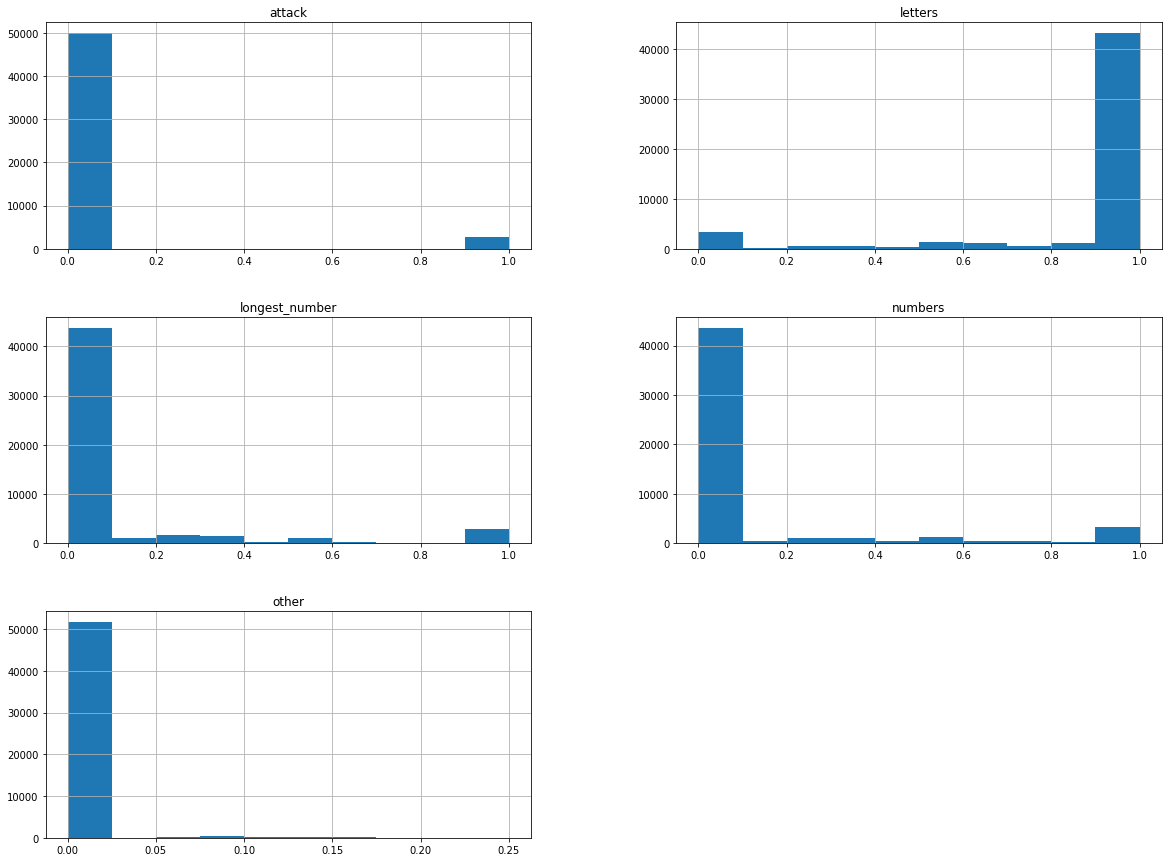

In [7]:
dns.hist(figsize=(20,15))
plt.show()

# Creación de un "test set"
Creación usando "stratified sampling" dependiendo si una consulta es un ataque o no.

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(dns, dns['attack']):
    train_set = dns.loc[train_index]
    test_set = dns.loc[test_index]

In [9]:
train_set['attack'].value_counts() / len(train_set)

0    0.949035
1    0.050965
Name: attack, dtype: float64

In [10]:
test_set['attack'].value_counts() / len(test_set)

0    0.949059
1    0.050941
Name: attack, dtype: float64

El conjunto de entrenamiento y el conjunto de test tienen proporciones similares.

# Descubrir y visualizar los datos

In [11]:
train_set_copy = train_set.copy()

Buscando correlaciones: comprobemos si algún atributo se correlaciona con el atributo de ataque.

In [12]:
corr_matrix = train_set_copy.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack            1.000000
numbers           0.355623
longest_number    0.214831
other            -0.029131
letters          -0.354139
Name: attack, dtype: float64

Los números y la ausencia de letras parecen tener algo de relación con los ataques.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bfacd3ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5bfb96b8d0>]], dtype=object)

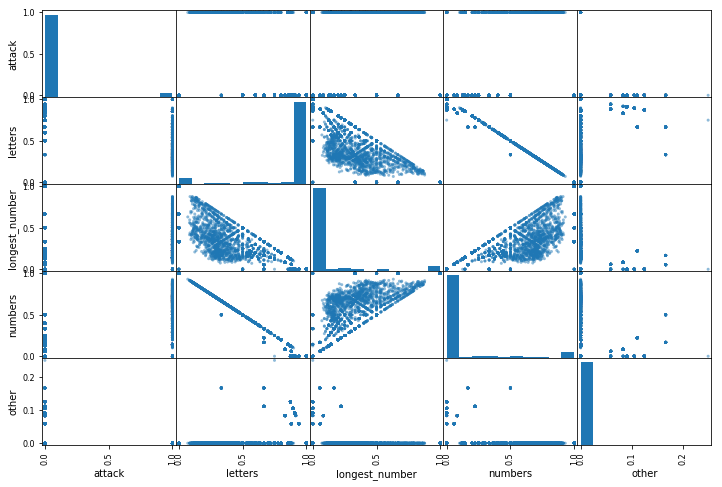

In [13]:
attributes = train_set_copy.columns
scatter_matrix(train_set_copy[attributes], figsize=(12, 8))

# Seleccionar y entrenar un modelo

In [14]:
features = train_set.drop('attack', 1)
features

,letters,longest_number,numbers,other
19038,1.000000,0.000000,0.000000,0.0
34347,1.000000,0.000000,0.000000,0.0
38293,1.000000,0.000000,0.000000,0.0
15027,1.000000,0.000000,0.000000,0.0
32646,1.000000,0.000000,0.000000,0.0
18206,0.315789,0.210526,0.684211,0.0
40710,1.000000,0.000000,0.000000,0.0
47415,1.000000,0.000000,0.000000,0.0
21099,1.000000,0.000000,0.000000,0.0
10444,1.000000,0.000000,0.000000,0.0


In [15]:
labels = train_set['attack']
labels

19038    0
34347    0
38293    0
15027    0
32646    0
18206    1
40710    0
47415    0
21099    0
10444    0
20086    0
46941    0
22703    1
27980    0
29957    0
21281    0
37689    0
35961    0
7664     1
23435    0
37630    0
35801    0
6023     0
7777     0
33452    0
20629    0
46080    0
3813     0
19759    0
2792     0
        ..
19146    0
45370    0
2599     0
9440     0
20665    0
40669    0
17967    0
21537    0
40308    0
41310    0
39340    0
26520    0
10041    0
3399     0
20828    0
21972    0
25180    0
26146    0
14883    0
32959    0
38584    0
14303    0
4482     0
19699    0
29817    0
38981    0
1251     0
29917    0
46138    0
18349    0
Name: attack, Length: 42088, dtype: int64

## Stochastic Gradient Descent (SGD) classifier

In [16]:
sgd_clf = SGDClassifier(max_iter=5, random_state=13)
sgd_clf.fit(features, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=13, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", sgd_clf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [18]:
train_predicted_labels = cross_val_predict(sgd_clf, features, labels, cv=5)

In [19]:
confusion_matrix(labels, train_predicted_labels)

array([[39419,   524],
       [ 1319,   826]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [20]:
precision_score(labels, train_predicted_labels)

0.61185185185185187

In [21]:
recall_score(labels, train_predicted_labels)

0.38508158508158508

In [22]:
f1_score(labels, train_predicted_labels)

0.47267525035765379

### Análisis

Obtengamos la puntuación que el clasificador SGD da a todas las predicciones.

In [23]:
labels_scores = cross_val_predict(sgd_clf, features, labels, cv=5, method='decision_function')

In [24]:
labels_scores

array([-1.32014876, -1.32014876, -1.32014876, ..., -1.35895329,
       -1.35895329, -1.35895329])

Las puntuaciones viven entre los valores -1.52 y 3.49:

In [25]:
labels_scores.min()

-1.5234796359363669

In [26]:
labels_scores.max()

3.4922538572202861

Tracemos la curva de precisión vs. exhaustividad.

In [27]:
precisions, recalls, thresholds = precision_recall_curve(labels, labels_scores)

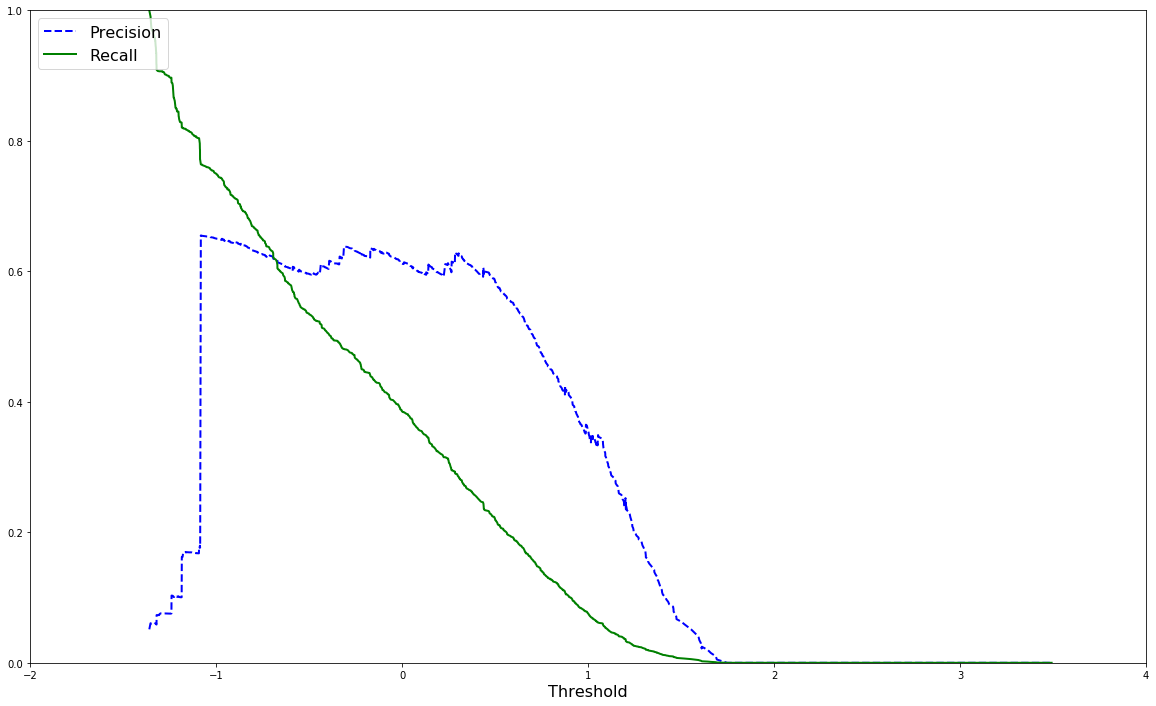

In [28]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2, 4])
plt.show()

Con un valor cercano a -1 de umbral parece dar un resultado aceptable de precisión/exhaustividad:

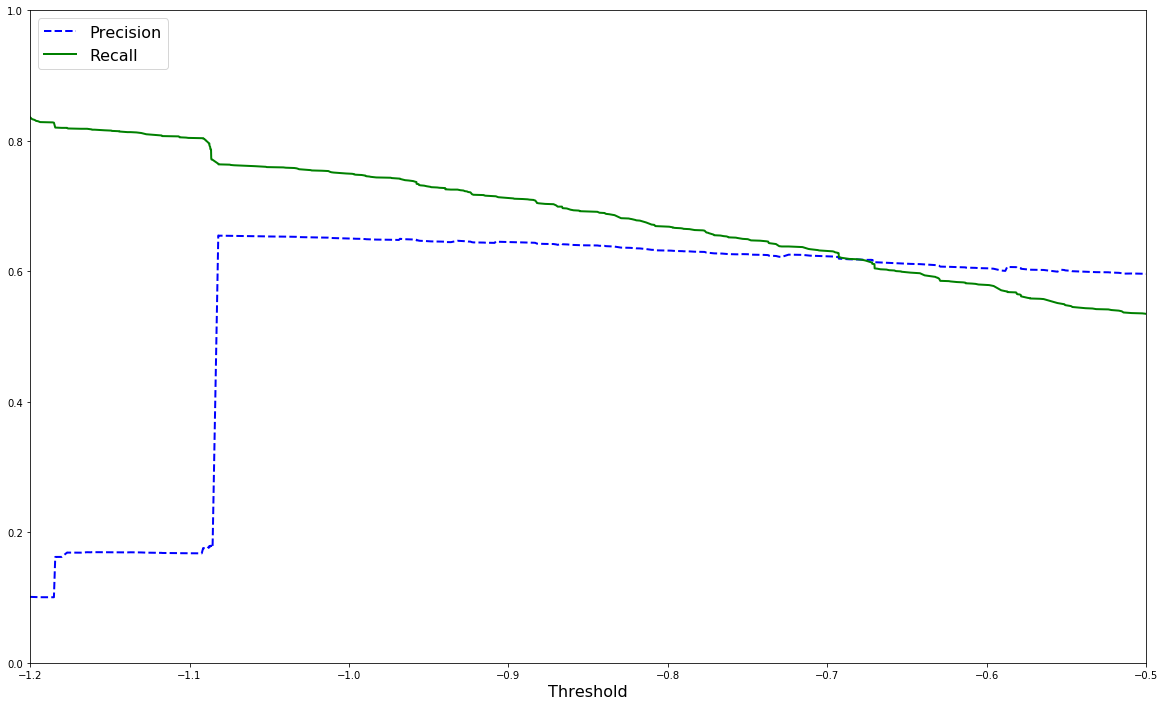

In [29]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1.2, -0.5])
plt.show()

In [30]:
labels_train_pred_30 = (labels_scores > -1)

In [31]:
confusion_matrix(labels, labels_train_pred_30)

array([[39079,   864],
       [  537,  1608]])

In [32]:
precision_score(labels, labels_train_pred_30)

0.65048543689320393

In [33]:
recall_score(labels, labels_train_pred_30)

0.7496503496503496

In [34]:
f1_score(labels, labels_train_pred_30)

0.69655620532813511

## Logistic Regression classifier

In [35]:
log_reg_clf = LogisticRegression(random_state=13, solver='liblinear')
log_reg_clf.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
print("Predictions:", log_reg_clf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [37]:
train_predicted_labels = cross_val_predict(log_reg_clf, features, labels, cv=5)

In [38]:
confusion_matrix(labels, train_predicted_labels)

array([[39475,   468],
       [ 1636,   509]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [39]:
precision_score(labels, train_predicted_labels)

0.52098259979529171

In [40]:
recall_score(labels, train_predicted_labels)

0.23729603729603729

In [41]:
f1_score(labels, train_predicted_labels)

0.32607303010890454

### Análisis

Para poder representar gráficamente como actúa el modelo, dejemos sólo las dos características relacionadas con los números.

In [42]:
reduced_features = features.drop(['letters', 'other'], 1)
train_predicted_labels = cross_val_predict(log_reg_clf, reduced_features, labels, cv=5)

In [43]:
confusion_matrix(labels, train_predicted_labels)

array([[39475,   468],
       [ 1645,   500]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [44]:
precision_score(labels, train_predicted_labels)

0.51652892561983466

In [45]:
recall_score(labels, train_predicted_labels)

0.23310023310023309

In [46]:
f1_score(labels, train_predicted_labels)

0.32123353678123995

Al deshacernos de las dos características anteriories, la precisión y exhaustividad se mantienen muy similares.
Generamos datos para ver cómo evolucionan las estimaciones con los cambios de números.

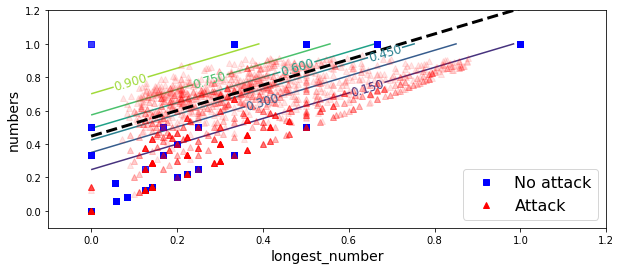

In [47]:
log_reg_clf.fit(reduced_features, labels)

x0, x1 = np.meshgrid(
        np.linspace(0, 1, 1000).reshape(-1, 1),
        np.linspace(0, 1, 1000).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg_clf.predict_proba(X_new)

plt.figure(figsize=(10, 4))

X = reduced_features.values
y = labels.values
# Plot the no attacks (y==0), x-axis: 'longest_number' (X[:, 0]), y-axis: 'numbers' (X[:, 1])
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs', alpha=0.1, label="No attack")
# Plot the attacks (y==1), x-axis: 'longest_number' (X[:, 0]), y-axis: 'numbers' (X[:, 1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^', alpha=0.1, label="Attack")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz)

left_right = np.array([0, 1])
boundary = -(log_reg_clf.coef_[0][0] * left_right + log_reg_clf.intercept_[0]) / log_reg_clf.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)

plt.xlabel("longest_number", fontsize=14)
plt.ylabel("numbers", fontsize=14)

plt.axis([-0.1, 1.2, -0.1, 1.2])

leg = plt.legend(loc='lower right', fontsize=16)
# In order to show the legend with an alpha of 1
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(1)

plt.show()


Con esta representación se puede ver claramente que no hay ninguna frontera de decisión debido a la distribución de las características. Por lo tanto, un modelo de "Logistic Regression" no tendrá un buen rendimiento, debido a que no es capaz de diferenciar claramente los ataques de los que no lo son. La línea de puntos marca la frontera de decisión que usa el modelo para decidir si es un ataque o no.

## Support Vector Machines

* ## Con Polynomial Kernel

In [48]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=3, coef0=1, C=5)
svm_clf_poly.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
print("Predictions:", svm_clf_poly.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [50]:
train_predicted_labels = cross_val_predict(svm_clf_poly, features, labels, cv=5)

In [51]:
confusion_matrix(labels, train_predicted_labels)

array([[39591,   352],
       [  577,  1568]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [52]:
precision_score(labels, train_predicted_labels)

0.81666666666666665

In [53]:
recall_score(labels, train_predicted_labels)

0.73100233100233103

In [54]:
f1_score(labels, train_predicted_labels)

0.77146371463714636

* ## Con Gaussian RBF Kernel

In [55]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13, gamma=5, C=5)
svm_clf_rbf.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
print("Predictions:", svm_clf_rbf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [57]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, features, labels, cv=5)

In [58]:
confusion_matrix(labels, train_predicted_labels)

array([[39697,   246],
       [  480,  1665]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [59]:
precision_score(labels, train_predicted_labels)

0.87127158555729989

In [60]:
recall_score(labels, train_predicted_labels)

0.77622377622377625

In [61]:
f1_score(labels, train_predicted_labels)

0.82100591715976334

El modelo "Gaussian RBF Kernel" da un rendimiento superior que los modelos antes analizados. Es uno de los modelos prometedores que serán afinados en la siguiente fase.

## Decision Trees

In [62]:
tree_clf = DecisionTreeClassifier(random_state=13)
tree_clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [63]:
print("Predictions:", tree_clf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [64]:
train_predicted_labels = cross_val_predict(tree_clf, features, labels, cv=5)

In [65]:
confusion_matrix(labels, train_predicted_labels)

array([[39887,    56],
       [  170,  1975]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [66]:
precision_score(labels, train_predicted_labels)

0.97242737567700643

In [67]:
recall_score(labels, train_predicted_labels)

0.92074592074592077

In [68]:
f1_score(labels, train_predicted_labels)

0.94588122605363989

### Análisis

In [69]:
export_graphviz(
        tree_clf,
        out_file='./images/tree_clf_dns.dot',
        feature_names=features.columns,
        class_names=['No attack', 'Attack'],
        rounded=True,
        filled=True
    )

![tree_clf_dns.png](./images/tree_clf_dns.png "Árbol de decisión")

El modelo "Decision Tree" parece dar un rendimiento bastante alto. Sin embargo, al no haber añadido ningún parámetro para restringir la estructura del modelo, es posible que este modelo esté algo sobreajustado, como veremos más adelante. Es otro de los modelos que será afinado en la siguiente fase.

## K-Nearest-Neighbors

In [70]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
print("Predictions:", knn_clf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [72]:
train_predicted_labels = cross_val_predict(knn_clf, features, labels, cv=5)

In [73]:
confusion_matrix(labels, train_predicted_labels)

array([[39888,    55],
       [  172,  1973]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [74]:
precision_score(labels, train_predicted_labels)

0.97287968441814598

In [75]:
recall_score(labels, train_predicted_labels)

0.91981351981351978

In [76]:
f1_score(labels, train_predicted_labels)

0.94560268392044089

El modelo KNN también tiene un rendimiento bastante alto, por lo que será afinado en la siguiente fase.

# Afinación de Modelos

Los tres últimos modelos parecen dar un mejor resultado que los otros, por lo tanto, el objetivo es modificar sus hiperparámetros para encontrar los mejores valores posibles para predecir los ataques. Más tarde, estos modelos pueden ser utilizados individualmente o combinando varios (Ensemble Methods).
Se utilizarán los métodos de "Randomized Search" y "Grid Search" para explorar las distintas combinaciones de hiperparámetros.
Para la puntuación, nos centraremos en el valor de exhaustividad (recall) ya que nuestro objetivo es el de poder clasificar el mayor número de ataques posibles.

## Support Vector Machines (Gaussian RBF Kernel)

### Randomized Search

In [ ]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13)
param_distribs = {
        'gamma': randint(low=1, high=100),
        'C': randint(low=1, high=500),
    }
svm_clf_rbf_rnd_search = RandomizedSearchCV(svm_clf_rbf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=True)
svm_clf_rbf_rnd_search.fit(features, labels)

In [ ]:
search_results = svm_clf_rbf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

Tenemos varios resultados con una exhaustividad alrededor de 0.91. A partir de estos datos, al realizar el "Grid Search" nos centraremos en los valores de "C" y "gamma" más bajos, para evitar el sobreajuste (overfitting).
Al usar el modelo anteriormente con los valores C=5 y gamma=5, obtuvimos una exahustividad de 0.77.
En esta ocasión, con unos valores de C=75 y gamma=74, obtenemos una exhaustivdad de 0.91. Por lo tanto, se retocarán estos valores por si se puede encontrar un resultado mejor.

### Grid Search

In [ ]:
param_grid = {'C': [10, 20, 30, 50], 'gamma': [1, 10, 20, 50]}
svm_clf_rbf_grid_search = GridSearchCV(svm_clf_rbf, param_grid, cv=5, scoring='recall', return_train_score=True)
svm_clf_rbf_grid_search.fit(features, labels)

In [ ]:
search_results = svm_clf_rbf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

Los valores de C=10 y gamma=50 parecen dar un resultado aceptable de exhaustividad con 0.89. Es preferible escoger estos valores más bajos, comprobaremos más adelante si son lo suficiente bajos para que no sobreajusten el modelo.

## Decision Trees

### Randomized Search

In [ ]:
param_distribs = {
        'max_depth': randint(low=5, high=8),
        'min_samples_split': randint(low=4, high=15),
        'min_samples_leaf': randint(low=3, high=10)
    }
tree_clf_rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=True)
tree_clf_rnd_search.fit(features, labels)

In [ ]:
search_results = tree_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

Al añadir estos parámetros al árbol de decisión nos encontramos con valores más bajos de exahustividad que cuando el modelo no tenía parámetros. Es muy probable que el modelo sin parámetros estuviera sobreajustado, debido al propio funcionamiento del modelo. Si un árbol de decisión se deja sin restricciones, éste tenderá a ajustarse a los datos, adaptándose a ellos de forma muy cercana. Por lo tanto, hay muchas posibilidades de que un árbol de decisión sin restricciones estará sobreajustado.
Debido a esto, añadiremos algunos parámetros a nuestro árbol para que pueda generalizar más con nuevos conjuntos de datos.

### Grid Search

In [ ]:
param_grid = {'max_depth': [7], 'min_samples_leaf': [4, 8, 12], 'min_samples_split': [8, 12, 15]}
tree_clf_grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='recall', return_train_score=True)
tree_clf_grid_search.fit(features, labels)

In [ ]:
search_results = tree_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

El resultado son valores bastante similares de exahustividad. Para que el árbol de decisión generalice lo máximo posible, trataremos de maximizar los parámetros "min_\*" y minimizar los parámetros "max_\*".

## K-Nearest-Neighbors

### Randomized Search

In [ ]:
param_distribs = {
        'n_neighbors': randint(low=1, high=50),
        'weights': ['distance']
    }
knn_clf_rnd_search = RandomizedSearchCV(knn_clf, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='recall', random_state=13, return_train_score=True)
knn_clf_rnd_search.fit(features, labels)

In [ ]:
search_results = knn_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

Usando el parámetro "distance" cambiamos el peso usado en la predicción. El peso por defecto es uniforme, por lo que cada vecino tiene el mismo peso. Al hacer este cambio, el peso de un vecino es calculado con la inversa de su distancia. Por lo tanto, los vecinos más cercanos tendrán más peso.

### Grid Search

In [ ]:
param_grid = {'n_neighbors': [3, 7, 15], 'weights': ['uniform', 'distance']}
knn_clf_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='recall', return_train_score=True)
knn_clf_grid_search.fit(features, labels)

In [ ]:
search_results = knn_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

No parece haber una gran variación en la exhaustividad, trataremos de adoptar un valor de número de vecinos intermedio para evitar el sobreajuste o el subajuste.

# Ensemble Learning

Debido a que ya hemos estrechado nuestras opciones con respecto a qué modelos usar y hemos ajustado los modelos más prometedores, ahora podemos probar a combinar varios modelos para ver si al ser usados conjuntamente, aumenta su rendimiento.

## Modelos Elegidos

Elegiremos los modelos con los siguientes parámetros:
- Support Vector Machines (Gaussian RBF Kernel): {'C': 10, 'gamma': 50}. Exhaustividad: 0.89.
- Decision Trees: {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 12}. Exhaustividad: 0.86.
- K-Nearest-Neighbors: parámetros por defecto ({'n_neighbors': 5, 'weights': 'uniform'}). Exhaustividad: 0.91.

In [ ]:
svm_clf_rbf_tuned = SVC(kernel='rbf', random_state=13, gamma=50, C=10)
svm_clf_rbf_tuned.fit(features, labels)

In [ ]:
tree_clf_tuned = DecisionTreeClassifier(random_state=13, max_depth=7, min_samples_leaf=8, min_samples_split=12)
tree_clf_tuned.fit(features, labels)

In [ ]:
knn_clf

## Voting Classifiers

Usa la técnica de agregar las predicciones de diferentes clasificadores seleccionando la clase que obtiene más votos.

### SVM + Decision Tree + KNN

In [ ]:
voting_clf_s_d_k = VotingClassifier(
    estimators=[('svm', svm_clf_rbf_tuned), ('dt', tree_clf_tuned), ('knn', knn_clf)], voting='hard')
voting_clf_s_d_k.fit(features, labels)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [ ]:
train_predicted_labels = cross_val_predict(voting_clf_s_d_k, features, labels, cv=5)

In [ ]:
confusion_matrix(labels, train_predicted_labels)

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [ ]:
precision_score(labels, train_predicted_labels)

In [ ]:
recall_score(labels, train_predicted_labels)

In [ ]:
f1_score(labels, train_predicted_labels)

### SVM + Decision Tree

In [ ]:
voting_clf_s_d = VotingClassifier(
    estimators=[('svm', svm_clf_rbf_tuned), ('dt', tree_clf_tuned)], voting='hard')
voting_clf_s_d.fit(features, labels)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [ ]:
train_predicted_labels = cross_val_predict(voting_clf_s_d, features, labels, cv=5)

In [ ]:
confusion_matrix(labels, train_predicted_labels)

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [ ]:
precision_score(labels, train_predicted_labels)

In [ ]:
recall_score(labels, train_predicted_labels)

In [ ]:
f1_score(labels, train_predicted_labels)

### SVM + KNN

In [ ]:
voting_clf_s_k = VotingClassifier(
    estimators=[('svm', svm_clf_rbf_tuned), ('knn', knn_clf)], voting='hard')
voting_clf_s_k.fit(features, labels)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [ ]:
train_predicted_labels = cross_val_predict(voting_clf_s_k, features, labels, cv=5)

In [ ]:
confusion_matrix(labels, train_predicted_labels)

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [ ]:
precision_score(labels, train_predicted_labels)

In [ ]:
recall_score(labels, train_predicted_labels)

In [ ]:
f1_score(labels, train_predicted_labels)

### Decision Tree + KNN

In [ ]:
voting_clf_d_k = VotingClassifier(
    estimators=[('dt', tree_clf_tuned), ('knn', knn_clf)], voting='soft')
voting_clf_d_k.fit(features, labels)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [ ]:
train_predicted_labels = cross_val_predict(voting_clf_d_k, features, labels, cv=5)

In [ ]:
confusion_matrix(labels, train_predicted_labels)

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [ ]:
precision_score(labels, train_predicted_labels)

In [ ]:
recall_score(labels, train_predicted_labels)

In [ ]:
f1_score(labels, train_predicted_labels)

## Random Forests

La técnica anterior se sirve de varios algoritmos para realizar predicciones. Otras técnicas de "ensemble learning" son "bagging" y "pasting". Éstas consisten en entrenar el mismo algoritmo pero con distintos subconjuntos de los datos de entrenamiento.

"Bagging" y "pasting" permiten que las instancias de entrenamiento sean usadas varias veces por diferentes predictores, pero solo "bagging" permite que una instancia sea usada varias veces por el mismo predictor. Son usadas mayormente con árboles de decisión, aunque se pueden usar con cualquier tipo de modelo. En este caso usaremos árboles de decisión creando el enfoque llamado "random forests".

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
rnd_clf.fit(features, labels)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [ ]:
train_predicted_labels = cross_val_predict(rnd_clf, features, labels, cv=5)

In [ ]:
confusion_matrix(labels, train_predicted_labels)

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [ ]:
precision_score(labels, train_predicted_labels)

In [ ]:
recall_score(labels, train_predicted_labels)

In [ ]:
f1_score(labels, train_predicted_labels)

## Extremely Randomized Trees

Una técnica muy similar a "random forests" pero añade más aleatoriedad ya que la elección de los umbrales para cada característica se realiza de forma aleatoria.

In [ ]:
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
extra_clf.fit(features, labels)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [ ]:
train_predicted_labels = cross_val_predict(extra_clf, features, labels, cv=5)

In [ ]:
confusion_matrix(labels, train_predicted_labels)

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [ ]:
precision_score(labels, train_predicted_labels)

In [ ]:
recall_score(labels, train_predicted_labels)

In [ ]:
f1_score(labels, train_predicted_labels)

# Evaluar los Modelos con el "Test Set"

Después de probar varios modelos, seleccionar los mejores, ajustarlos y comprobar cómo funcionan cuando son combinados, podemos analizar su rendimiento usando el conjunto de datos que apartamos al principio como "test set". Los modelos nunca han visto esos datos, por lo tanto podemos ver como reaccionan con nuevos datos.

In [ ]:
features_test = test_set.drop('attack', 1)

In [ ]:
labels_test = test_set['attack']

## Support Vector Machines (Gaussian RBF Kernel)

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    svm_clf_rbf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## Decision Trees

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    tree_clf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## K-Nearest-Neighbors

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    knn_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## SVM + Decision Tree + KNN

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_s_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## SVM + Decision Tree

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_s_d, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## SVM + KNN

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_s_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## Decision Tree + KNN

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## Random Forests

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    rnd_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

## Extremely Randomized Trees

In [ ]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    extra_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Hay varios modelos o combinaciones de modelos con resultados bastante buenos. Parece ser que el que mayor exhaustividad obtiene es la combinación de los tres modelos SVM + Decision Tree + KNN. Esta combinación obtiene una precisión muy alta también.